In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt

d:\Anaconda3\envs\dialect\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


ValueError: x and y must have same first dimension, but have shapes (338048,) and (2641,)

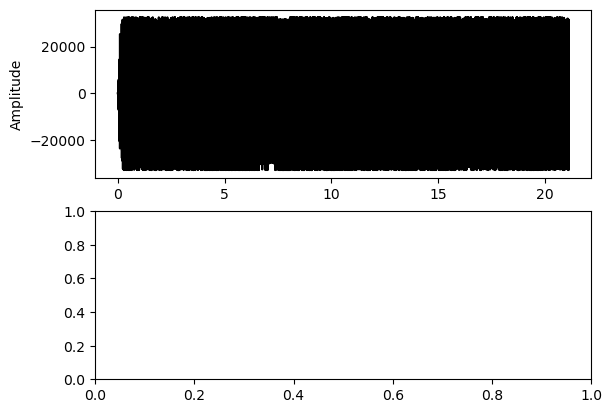

In [3]:
# 读取wav文件
f = wave.open("source.wav", "rb")
# 获取参数
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
# 读取波形数据
str_data = f.readframes(nframes)
f.close()
# 转换为数组
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, nchannels
wave_data = wave_data.T


In [ ]:

# 分帧处理
frame_size = 256 # 帧长256个采样点
frame_shift = 128 # 帧移128个采样点
wlen = len(wave_data[0]) # 信号总长度
frame_num = int(np.ceil(wlen / frame_shift)) # 计算帧数

# 补零操作，使得最后一帧也有足够的采样点
pad_size = frame_size + (frame_num - 1) * frame_shift - wlen 
pad_signal = np.append(wave_data[0], np.zeros(pad_size))

# 将信号转化为矩阵形式，每一行是一帧数据（长度为256）
indices = np.tile(np.arange(0, frame_size), (frame_num, 1)) + \
          np.tile(np.arange(0, frame_num * frame_shift, frame_shift), (frame_size, 1)).T 
indices = np.array(indices, dtype=np.int32)
frames = pad_signal[indices]

# 计算每一帧的能量值（平方和）
energy = np.sum(frames ** 2 , axis=1)

# 计算每一帧的过零率（符号变化次数）
signs = np.sign(frames) # 符号函数，正数返回+1，负数返回-1，0返回0
diffs = signs[:, :-1] - signs[:, 1:] # 相邻两个采样点符号相减 
zcrs= np.sum(abs(diffs) / 2 , axis=1) # 绝对值求和再除以2

# 设置双门限进行端点检测（根据实际情况调整）
energy_mean=np.sum(energy)/len(energy) # 能量均值 
sum=0 
lth=15*energy_mean/10.0 # 能量低门限 
hth=lth*4.0 # 能量高门限 
zcrs_mean=np.sum(zcrs)/len(zcrs) # 过零率均值 
zcrs_low=3*zcrs_mean/4.0 # 过零率低门限 

status=0;   # 初始状态为静音状态 
count=0;    # 静音状态计数器初始化为0  
silence=15;   # 静音状态至少持续15帧以上才能视为语音段结束 

start=[];   # 记录每一段语音开始位置  
end=[];     # 记录每一段语音结束位置  

for i in range(len(energy)):
    if status==0 or status==1:   # 状态为静音或者过渡状态时  
        if energy[i]>hth:        # 如果此时能量超过高门限，则将当前状态置为语音
            status=2;   # 将当前状态置为语音状态 
            start.append(i);  # 记录语音开始位置  
        elif energy[i]>lth:   # 如果能量超过低门限，将当前状态置为过渡状态 
            status=1; 
        else:                 # 如果能量低于低门限，将当前状态置为静音状态 
            status=0; 
    elif status==2:           # 状态为语音时  
        if energy[i]<lth:     # 如果此时能量低于低门限，则将当前状态置为过渡状态 
            status=1; 
            count=0;          # 过渡计数器清零  
        else:                 # 否则维持语音状态不变  
            status=2; 
    elif status==1:           # 状态为过渡时  
        if energy[i]<lth:     # 如果此时能量低于低门限，则增加过渡计数器 
            count+=1;         # 过渡计数器加一  
            if count>silence:  # 如果过渡计数器超过静音阈值，则将当前状态置为静音，并记录语音结束位置  
                status=0;
                end.append(i);
        else:                 # 否则重新将当前状态置为语音，并清空过渡计数器
            status=2;
            count=0;

# 绘制波形图和能量图
time = np.arange(0, wlen) / framerate
time2 = np.arange(0, frame_num * frame_shift) / framerate

plt.subplot(211)
plt.plot(time, wave_data[0], "black")
plt.ylabel("Amplitude")
plt.subplot(212)
plt.plot(time2, energy, "blue")
plt.ylabel("Energy")
plt.xlabel("Time (s)")

# 标记出语音段的位置
for i in range(len(start)):
    plt.vlines((start[i] * frame_shift) / framerate, -25000, 25000)
    plt.vlines((end[i] * frame_shift) / framerate, -25000, 25000)

plt.show()
# 源: 与必应的对话， 2023/3/1
# (1) 【语音识别】语音端点检测及Python实现_Luqiang_Shi的博客-CSDN博客_python语音端点检测. https://blog.csdn.net/Luqiang_Shi/article/details/91047080 访问时间 2023/3/1.
# (2) 语音信号处理 | Python实现端点检测_白鸟无言的博客-CSDN博客_python端点检测. https://blog.csdn.net/qq_42688495/article/details/109333598 访问时间 2023/3/1.
# (3) 用python实现语音端点检测 (Voice Activity Detection,VAD). https://blog.csdn.net/pk296256948/article/details/118853447 访问时间 2023/3/1.

In [1]:
import os
os.getcwd()

'd:\\Users\\GraduationDesign\\DialectClassification'